In [85]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier


In [34]:
# q1
df1=pd.read_csv('iris.csv', header=None)
df1

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


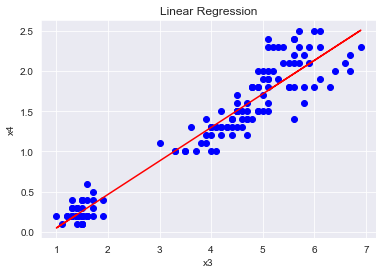

In [38]:
X = df1[2].values.reshape(-1,1)
y = df1[3].values
regressor = LinearRegression()
regressor.fit(X, y)
plt.scatter(X, y, color='blue')
plt.plot(X, regressor.predict(X), color='red')
plt.title('Linear Regression')
plt.xlabel('x3')
plt.ylabel('x4')
plt.show()

In [63]:
X = df1.iloc[:, 2:4].values
y = (df1.iloc[:, 4] == 3).astype(int)
logistic_reg = LogisticRegression()
logistic_reg.fit(X, y)
print('Logit = ', logistic_reg.intercept_[0],'+',logistic_reg.coef_[0][0],'* x3 +',logistic_reg.coef_[0][1],'* x4')

Logit =  -17.547992862096933 + 2.77759875268921 * x3 + 2.3855276472471956 * x4


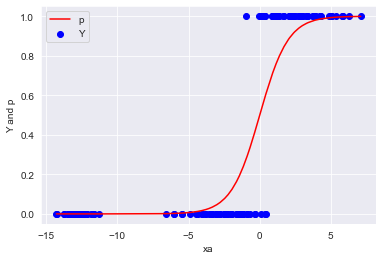

In [75]:
xa = np.dot(X, logistic_reg.coef_.T) + logistic_reg.intercept_
xa_sorted = np.sort(xa, axis=0)
index = [x[0] for x in xa.argsort(axis=0).tolist()]
y_sorted = pd.DataFrame(y, index=index).values.reshape(-1, 1)
p_sorted = logistic_reg.predict_proba(X)[:, 1][xa.argsort(axis=0)].reshape(-1, 1)

fig, ax = plt.subplots()
ax.scatter(xa_sorted, y_sorted, color='blue')
ax.plot(xa_sorted, p_sorted, color='red')
ax.set_xlabel('xa')
ax.set_ylabel('Y and p')
ax.legend(['p', 'Y'])
plt.show()

In [82]:
# q2
df2 = pd.read_csv('re_dat.csv', header=None)
X = df2.iloc[:, 0].values.reshape(-1, 1)
y = df2.iloc[:, 1].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

orders = np.arange(2, 16)
scores = []
for order in orders:
    poly = PolynomialFeatures(degree=order)
    X_poly = poly.fit_transform(X_train)
    model = LinearRegression()
    score = np.mean(cross_val_score(model, X_poly, y_train, cv=5))
    scores.append(score)
best_order = orders[np.argmax(scores)]
print("Best P*:", best_order)

Best P*: 15


R2 score on test dataset: 0.9126343153015376


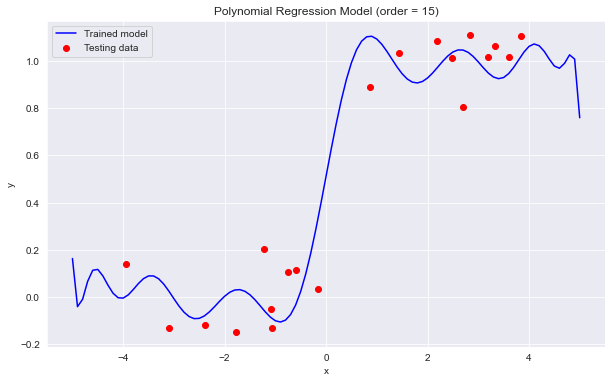

In [84]:
poly = PolynomialFeatures(degree=best_order)
X_poly = poly.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly, y_train)
X_poly_test = poly.transform(X_test)
y_pred = model.predict(X_poly_test)
r2 = r2_score(y_test, y_pred)
print("R2 score on test dataset:", r2)
x_grid = np.arange(-5, 5.1, 0.1).reshape(-1, 1)
X_grid_poly = poly.transform(x_grid)
y_grid_pred = model.predict(X_grid_poly)

plt.figure(figsize=(10, 6))
plt.plot(x_grid, y_grid_pred, color='blue', label='Trained model')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.legend()
plt.title("Polynomial Regression Model (order = {})".format(best_order))
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [86]:
df3 = pd.read_csv('winequality-red.csv')
X = df3.drop('quality', axis=1)
y = df3['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()